# Support Vector Machines

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### DATASET

In [3]:
df = pd.read_csv("C://Users//ertug//Desktop//Machine_Learning_Courses//_3_Classification//diabetes.csv//diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
y = df["Outcome"]

In [6]:
X = df.drop(["Outcome"], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=.3,
                                                    random_state=42)

### Model & Training

###  LINEAR

In [8]:
svm_model = SVC(kernel="linear", probability=True).fit(X_train, y_train)

In [9]:
y_pred = svm_model.predict(X_test)

In [10]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

0.5053822864043174

In [11]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [12]:
r2_score(y_test, y_pred)

-0.12822847682119232

In [13]:
confusion_matrix(y_test, y_pred)

array([[122,  29],
       [ 30,  50]], dtype=int64)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.63      0.62      0.63        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [15]:
svm_model.predict_proba(X_test)[:10]

array([[0.72738606, 0.27261394],
       [0.80066572, 0.19933428],
       [0.84185434, 0.15814566],
       [0.80600278, 0.19399722],
       [0.5       , 0.5       ],
       [0.58854702, 0.41145298],
       [0.97649265, 0.02350735],
       [0.40726817, 0.59273183],
       [0.45063442, 0.54936558],
       [0.24643437, 0.75356563]])

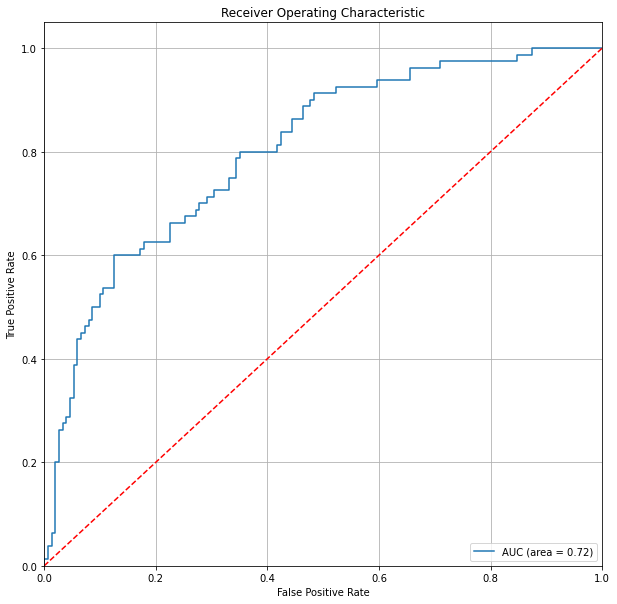

In [16]:
logit_roc_auc = roc_auc_score(y_test, svm_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, svm_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label="AUC (area = %.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([.0, 1.0])
plt.ylim([.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.savefig("LOG_ROC")
plt.grid(1)
plt.show()

### RBF (NON-LINEAR)

In [17]:
svm_model = SVC(kernel="rbf", probability=True).fit(X_train, y_train)

In [18]:
y_pred = svm_model.predict(X_test)

In [19]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

0.513876701232177

In [20]:
accuracy_score(y_test, y_pred)

0.7359307359307359

In [21]:
r2_score(y_test, y_pred)

-0.16647350993377508

In [22]:
confusion_matrix(y_test, y_pred)

array([[131,  20],
       [ 41,  39]], dtype=int64)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       151
           1       0.66      0.49      0.56        80

    accuracy                           0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.73      0.74      0.72       231



In [24]:
svm_model.predict_proba(X_test)[:10]

array([[0.73525909, 0.26474091],
       [0.77313529, 0.22686471],
       [0.82900786, 0.17099214],
       [0.85241229, 0.14758771],
       [0.56496066, 0.43503934],
       [0.59341178, 0.40658822],
       [0.96809608, 0.03190392],
       [0.56884102, 0.43115898],
       [0.30798544, 0.69201456],
       [0.35491166, 0.64508834]])

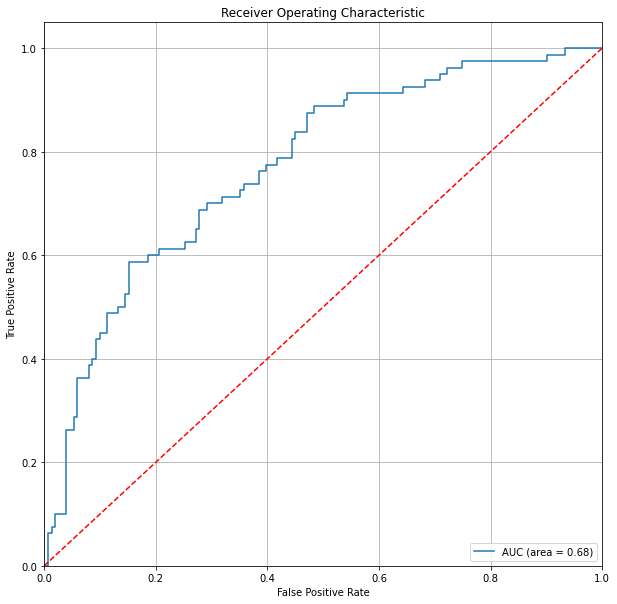

In [25]:
logit_roc_auc = roc_auc_score(y_test, svm_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, svm_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label="AUC (area = %.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([.0, 1.0])
plt.ylim([.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.savefig("LOG_ROC")
plt.grid(1)
plt.show()

### MODEL TUNING

In [26]:
svm_model = SVC().fit(X_train, y_train)

In [27]:
svm_params = {"C": np.arange(1, 10),
              "kernel": ["rbf", "linear"]}

In [28]:
svm_cv_model = GridSearchCV(svm_model, svm_params, cv=10, verbose=2, n_jobs=-1).fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 24.0min finished


In [29]:
svm_cv_model.best_params_

{'C': 5, 'kernel': 'linear'}

In [31]:
svm_cv_model.best_score_

0.7765199161425576

In [43]:
svm_tuned = SVC(C=svm_cv_model.best_params_.get("C"), 
                kernel=svm_cv_model.best_params_.get("kernel"),
                probability=True).fit(X_train, y_train)

In [44]:
y_pred = svm_tuned.predict(X_test)

In [45]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

0.5053822864043174

In [46]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [47]:
r2_score(y_test, y_pred)

-0.12822847682119232

In [48]:
confusion_matrix(y_test, y_pred)

array([[122,  29],
       [ 30,  50]], dtype=int64)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.63      0.62      0.63        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [50]:
svm_tuned.predict_proba(X_test)[:10]

array([[0.72376482, 0.27623518],
       [0.80309791, 0.19690209],
       [0.84034773, 0.15965227],
       [0.80796715, 0.19203285],
       [0.48486006, 0.51513994],
       [0.57826673, 0.42173327],
       [0.97718489, 0.02281511],
       [0.40794062, 0.59205938],
       [0.4381268 , 0.5618732 ],
       [0.23406265, 0.76593735]])

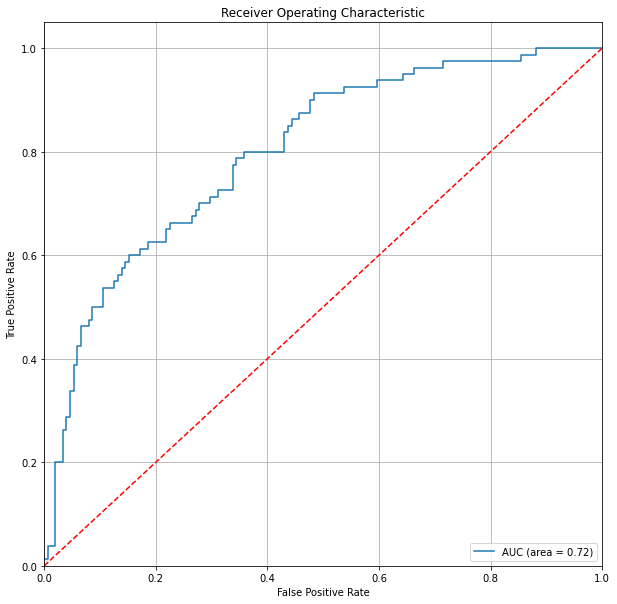

In [51]:
logit_roc_auc = roc_auc_score(y_test, svm_tuned.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, svm_tuned.predict_proba(X_test)[:,1])
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label="AUC (area = %.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([.0, 1.0])
plt.ylim([.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.savefig("LOG_ROC")
plt.grid(1)
plt.show()